In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import value_counts
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from Functions import accuracy, predict_outcome

In [2]:
# load dataset
dataset = pd.read_csv('FALL_without_raw.csv')

In [3]:
dataset.head(5)

,DB,BDL,PF,PLF,TPF,TPLF,Follower 1-5,Platoon Length,Packet Drop,IVD
0,1,0,0,0,0,0,1,5,0.2,0
1,1,0,0,0,0,0,1,6,0.2,0
2,1,0,0,0,0,0,1,7,0.2,0
3,1,0,0,0,0,0,1,8,0.2,0
4,1,0,0,0,0,0,1,9,0.2,0


In [4]:
#split dataset in features and target variable
X = dataset.drop('IVD', axis=1) # Features
Y = dataset.IVD # Target variable

value_count = dataset.IVD.value_counts()

Text(0.5, 1.0, 'Feature correlation')

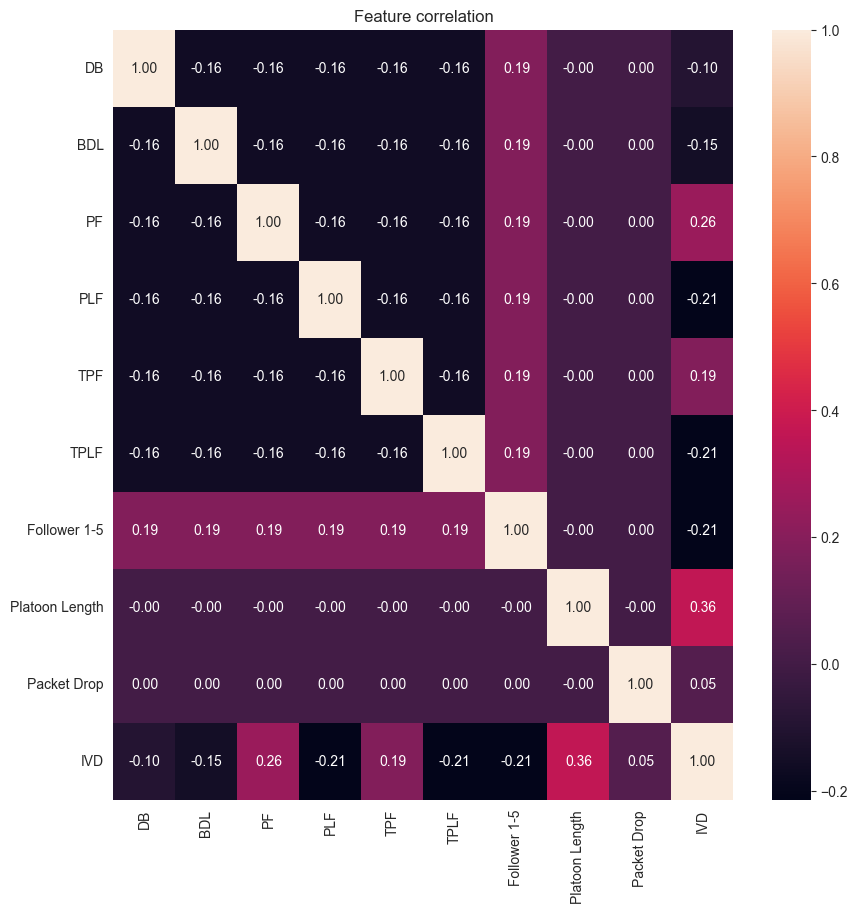

In [5]:
plt.figure(figsize=(10,10))
corr_plot = sns.heatmap(dataset.corr(), annot=True, fmt = "0.2f")
plt.title("Feature correlation")

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


In [7]:
# Create Decision Tree classifier object
tree_model = DecisionTreeClassifier( )
tree_model = tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
accuracy(y_test,y_pred, value_count)

Number of positives and negatives: 
 IVD
0    1024
1     296
Name: count, dtype: int64
Confusion Matrix: 
 [[301  14]
 [  8  73]]
Accuracy: 0.9444444444444444 
Precision: 0.8390804597701149 
Recall: 0.9012345679012346 
F1 Score: 0.8690476190476191


In [8]:
svc_model = SVC()
svc_model = svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)

accuracy(y_test,y_pred, value_count)

Number of positives and negatives: 
 IVD
0    1024
1     296
Name: count, dtype: int64
Confusion Matrix: 
 [[312   3]
 [ 28  53]]
Accuracy: 0.9217171717171717 
Precision: 0.9464285714285714 
Recall: 0.654320987654321 
F1 Score: 0.7737226277372263


In [9]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

accuracy(y_test,y_pred, value_count)

Number of positives and negatives: 
 IVD
0    1024
1     296
Name: count, dtype: int64
Confusion Matrix: 
 [[295  20]
 [ 19  62]]
Accuracy: 0.9015151515151515 
Precision: 0.7560975609756098 
Recall: 0.7654320987654321 
F1 Score: 0.7607361963190185


In [10]:
#predict_outcome(dataset)
print(f'Prediction: {predict_outcome(dataset, tree_model)}')

Enter prediction variables:
Prediction: No crash
